# クラスタリングについて（1）

今回は以下の内容について解説する。

  - クラスタリング概論
      - 各種クラスタリング手法の特徴
      - クラスタの持つべき性質とクラスタの評価指標
  - 代表的な手法 K-Means 法の詳細、実践


## クラスタリング概論

クラスタリングとは、データ点集合や母集団全体をいくつかのグループ（クラスタ）に分割する作業である。同じグループ内の他のデータ点同士の方が他のグループ内のデータ点よりも類似しているようなグループ分けになっているように行う。

### 各種クラスタリング手法の特徴

何をクラスタとみなすかには文脈や状況によって異なるため、クラスタリングの方法は多くある。いずれの手法も、データ点の間の「類似度」を定義するそれぞれのルールに従っている。100種類以上のクラスタリングアルゴリズムが知られているが、よく使われる手法はごく一部である。よく使われるものについて見ていく。:</br>

- __Centroid (重心) モデル:__ クラスタをデータ点集合の重心に基づいて計算する。具体的には以下の条件を満たすようにクラスタを決める。
    1. クラスタに所属するデータ点集合全体の平均を重心とする。
    0. 各データ点は最も近い重心が表すクラスタに所属する。
    
  上記で定義されるクラスタの全体最適解を求めようとすると計算量が大きくなるので、局所解を求める近似手法が用いられる。最も代表的なものは __K-Means アルゴリズム__ で、反復計算によってK個の重心ベクターを探し出す。この手法ではクラスタの数を最初に指定する必要があり、データセットについての事前知識が重要になる。また、1. について、通常は平均を用いるが中央値などを用いる手法もある。

- __Connectivity (定訳はないが直訳すれば「接続性」)モデル:__ データ空間内で近いものから順に同じクラスタに属するようにする考え方に基づくモデルである。計算方法は2種類のアプローチに分かれる。
  1. 全てのデータ点を最初に一つ一つの異なるクラスターに割り当てたあと、距離が小さいものをまとめていく(agglomerative, 凝集型)
  0. データ点全体を単一のクラスターに割り当てて、最も均質度の高いクラスタを分離していく(divisive, 分割型)
      - こちらはかなり重たいので、あまり使われない。
  
  「近さ」(点と点/点とクラスタ = ここを工夫できる)をどう定義するかによって結果が変わるため、目的に応じた距離関数の選択が重要である。これらのモデルは大きなデータセットに対してスケールしないという欠点がある。

- __Density (密度)モデル:__ データ空間の中で高い密度でデータ点のある領域を探索し、その中にある点をクラスターとして割り当てていくモデルである。密度の低い領域にある点は外れ値扱いされる。よく使われるものとして __DBSCAN__ と __OPTICS__がある。
    - 連続が主眼の場合に用いられる。

- __Distribution (分布)モデル:__ データ集合全体が(いくつかのパラメータを用いた数式によって記述されるような)ある確率分布に従って生み出されるという前提に基づき、そのパラメータをデータから推測する。確率分布を記述するためのパラメータを増やせば増やすほど精度が上がるという過学習の問題が生じうるため、適切にハイパーパラメータを選択する必要がある。よく使われるものの例としては __ガウス混合分布モデル(Gaussian Mixture Model, GMM)__ がある。
    - ガウシアンは早く解ける

各種のクラスタリングアルゴリズムをトイデータセットに対して実行した結果の図表を以下に示す(Scikit-Learn のサイトより)。

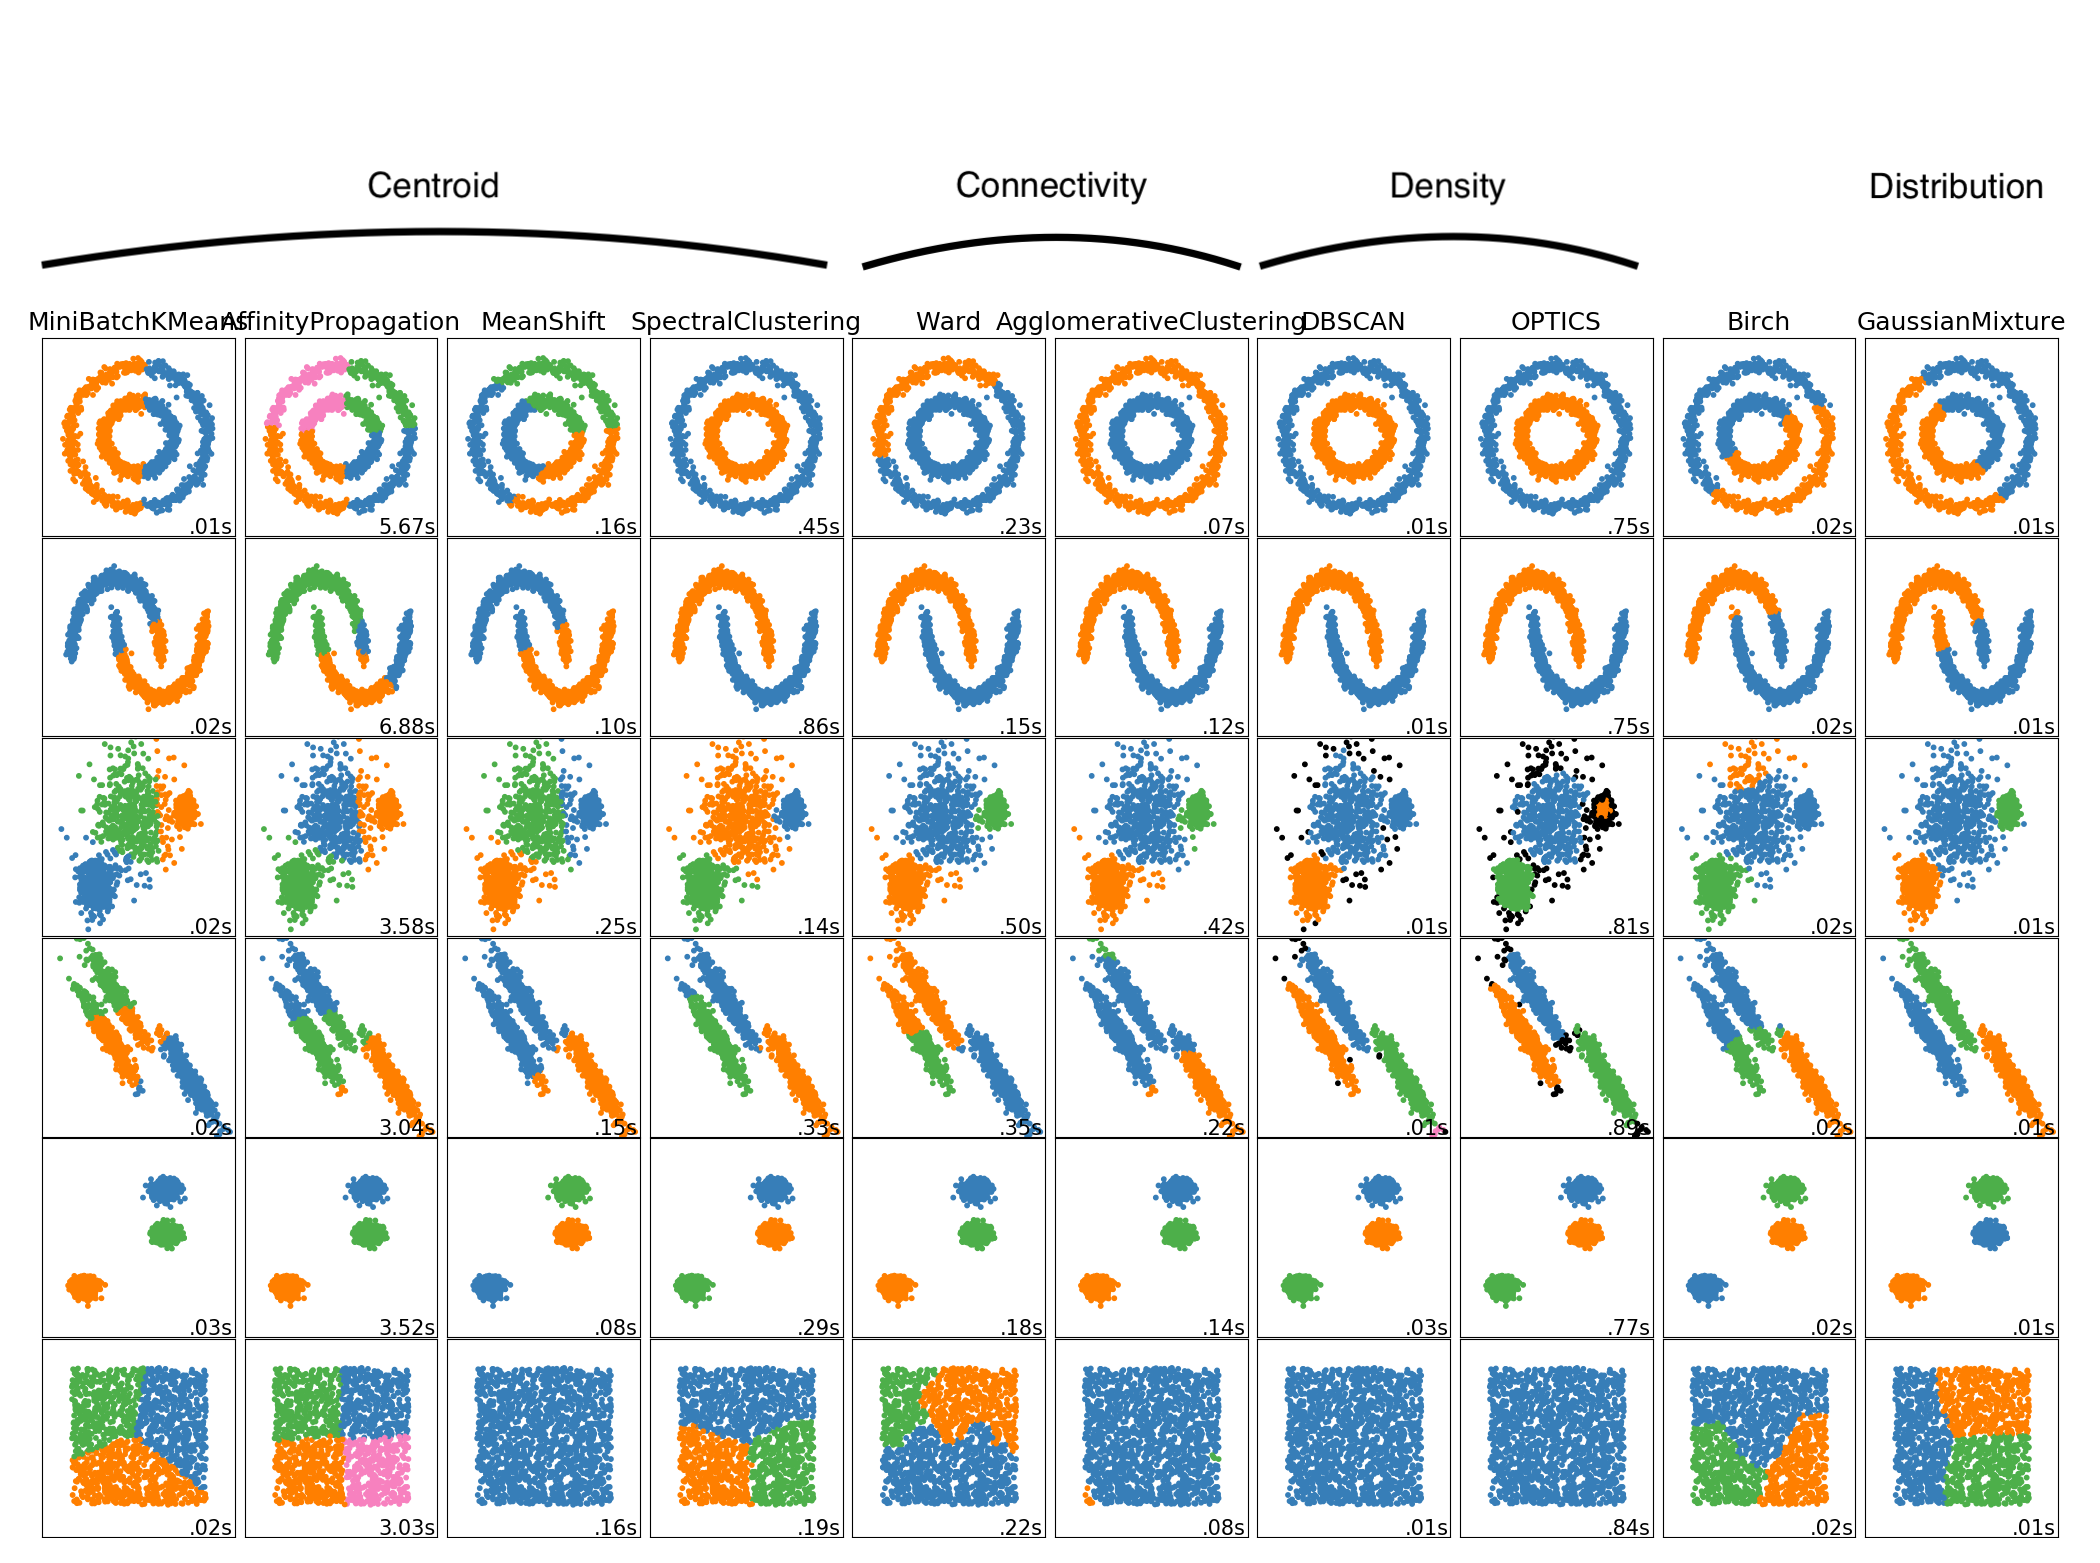

In [1]:
from IPython.display import Image
Image("figures/sphx_glr_plot_cluster_comparison_001.png")

**補足**
- Birchは基本Centroidだが、木構造を仮定する点で特殊。
- 上2つは超平面でキレイに切れるが、線形分離できないサンプル。逆に線形分離できるものを"flat geometry"と呼ぶことがある
    - Density系のアルゴリズムが強い。SpectralClustringも強いがこれは一度、高次の空間を経由しているため
- 下から2行目と3行目は斜め円と普通の円
    - Density, Distribution系はできるが、**Centroid系は楕円を楕円として分離できない。**
    - Centroid(特にKMeans)は同一で均質でないと上手く行かない(上から3つ目)
- 計算時間
    - Kmeans, DBSCAN, Birchが速い。
        - Kmeansの計算オーダーはO(KN)
        - GMMはデータ点が増えると大変。

以下に、代表的な手法の特徴の比較対象表を示す。

|手法名|カテゴリ|向いているデータ、使い道|スケール性|パラメータ|
|--|--|--|--|--|
| K-Means | Centroid | 各クラスタ内のデータ点数が同程度の超平面で分離できるデータ  | クラスタ数が中程度であれば大量のデータ点数に対応できる | クラスタ数 |
| Ward 法 | Connectivity | クラスタ数が多い時 | 比較的大きなデータ点数およびクラスタ数  | クラスタ数あるいはクラスタ間の距離の閾値 | 
| 凝集型階層クラスタリング (Ward 法以外) | Connectivity | クラスタ数が大きく、ユークリッド距離以外の距離指標を用いるのが妥当なデータ | 比較的大きなデータ点数およびクラスタ数 | クラスタ数あるいはクラスタ間の距離の閾値、クラスタを併合するやり方 |
| Gaussian Mixture | Distribution | ガウス混合分布により近似できるデータに使える、密度推定に使える | スケールしない | （大量） |
| DBSCAN | Density | 超平面で分離できないデータ、クラスタサイズが不均衡な場合 | 非常に大きなデータ点数、中程度のクラスター数 | 近傍とみなすデータ点の数 |
| OPTICS | Density | 超平面で分離できないデータに使える、クラスタサイズが不均衡な場合、クラスタ周辺のデータの密度にブレがある場合 |非常に大きなデータ点数、大きなクラスター数  | クラスター内のデータ点数の最小値 |

- Wardはクラスタ数に関係なく走る
- 凝集型階層クラスタリング (Ward 法以外)はユークリッド距離以外の距離が使えることが魅力。特に、クラスタと点との距離を"リンケージ"と呼ぶことがある。
- DBSCAN: KNN的な近傍法を用いたアルゴリズム。
- OPTICS: DBSCANの改良版。DBSCANは密度が一定以下を外れ値とする。密度にブレがある場合もできる。スケール性もある。

#### アルゴリズム選択の際の注意点

DBSCAN のようなdensityベースの手法は、例えば上記のグラフの最上段などで二重の円をそれぞれに分離することが出来ており、一見するとK-meansなどに比べて「良い」手法であるように見える。しかしながら、観点を変えてみれば、DBSCAN などの結果では円に沿って大きく値が異なる領域を同じ一つのクラスタであると見なしてしまっており、これはデータやクラスタリング目的次第では不適切な分類でありうる。 
何が「良い」クラスタリング結果であるのかはクラスタリングの目的によって異なる。連続した領域の検出を行うことが妥当であるならば density model を用いる、値の大小によって超平面で切っていくのが大きな意味を持つのであれば K-means、といったように、クラスタリングの目的に応じたモデル・アルゴリズムを選択するのが重要だ。

### クラスターの持つべき性質および評価指標(セントロイド的な立場から...)

これからクラスタの持つ各種の性質、そして何が「良い」クラスタであるかを定義するための指標を見ていく。

例題として、ここでは顧客セグメンテーションを行いたい銀行があると仮定する。単純にするため、この銀行は所得と債務だけでセグメンテーションを行たいと考えていることにする。彼らが収集した顧客データを散布図にすると以下のようになった:
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-14-46-17.png"/>

X軸が顧客の所得でY軸が債務である。
ここで、我々は以下のように顧客が4つの異なるクラスターに分けられることをはっきりと示すことができる:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-14-47-20.png"/>

銀行はこれらのクラスターからさらに今後の戦略を立てたり、顧客に対して様々な施策が打ったりできるだろう。そこで、これらのクラスタが持つべき性質を見ていこう。

#### 性質 1

あるクラスタが含む全てのデータ点はお互いに似ているべきだ。(マーケティング目的など)
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-14-49-11.png"/>

もしある特定のクラスタが含む顧客が似ていなければ、顧客の要望は多岐にわたってしまうだろう。銀行が彼らにうつ施策への反応も様々になってしまうだろうから、それは望ましくない。同じクラスタ内には似ている顧客がいればマーケティングの助けになるだろう。

#### 性質 2

異なるクラスタからのデータ点同士はできるだけ異なっているべきだ。(マーケティング目的など)(上の1つとあわせて、はさみうち)

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-14-51-31.png"/>

上の二つの分け方のうちどちらがより良いクラスタとなるだろうか？　まずは Case I を見ていく:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-14-52-26.png"/>

赤と青のクラスターの中にある顧客はお互いによく似ている。赤いクラスター内の上の方にある4つの点は青いクラスターの上の方にある2つの点と似た性質を持っている。彼らはみな収入と債務どちらも高い額を示しているが、ここでは我々は彼らを別々のクラスターに割り当ててしまっている。

他方、Case II を見ていこう:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-14-52-58.png"/>

赤いクラスタ内の点は青いクラスター内のものと全く異なっている。赤いクラスター内の全ての顧客は高い収入と高い債務の額という特徴があり、青いクラスターは収入が高く債務額が低い。明らかにCase Iよりもよい顧客のクラスタリングができている。

このように、意味のあるクラスターを得るためには、異なるクラスタから取られたデータ点同士はできるだけ異なっているべきなのだ。

### クラスターの評価指標(セントロイド的な文脈において...)(上記の話を定量化)

上記の例では変数が2つしかなかったため、可視化してどちらがよりよいクラスター分けであるかを決めることは容易だった。
残念ながら、現実的なデータではそういうことはあまりない。我々はたくさんの変数を扱う必要があるかもしれない。例えば銀行の顧客セグメンテーションでいけば、収入と債務に加えて居住地や性別、年齢、他にももっとたくさんの変数があるかもしれない。すべての変数を一度に可視化してどちらが意味のあるクラスタリング結果か決めるのはおそらく人間には不可能だろう。
なので、評価指標が役に立つ。そのうちのいくつかについて以下で論じる。

#### inertia

上で我々が述べた性質1について評価するのが inertia で、これはクラスタ内の点同士がどれだけ離れているかの指標である。inertia によって、群の中の点同士がどれだけ離れているかを知ることができる。
inertia は各データ点とそれが属するクラスタの重心との間の距離の総和である。

$$
\mathrm{inertia} = \sum{d(x_i, cr(x_i))}
$$

ここで $cr(x_i)$ は $x_i$ が属するクラスタの重心の位置、$d(x, y)$ は $x$ と $y$ との間の距離である。

一つのクラスタに絞って各データ点との距離を見た場合、intra-cluster distance (クラスター内距離)と呼ばれる指標になる:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-15-32-17.png"/>

あるクラスタ内のデータ点同士が似ている時、それらとクラスタの重心との距離は小さくなるはずであり、よってクラスター内距離は小さい値であるほどよいクラスタであるということができる。すべてのデータ点の位置が一致すればクラスター内距離は0になる。
inertia をデータ点の数で割るとクラスター内距離を各クラスタ内のデータ点の数で重みづけした平均になるためinertiaの比較は重み付け平均の比較と捉えてもよいだろう。inertia が小さいことはクラスター内距離が全体として小さいクラスタ分けになっていることを意味しており、inertia が小さいほどクラスタ内のデータ点の均質性という観点ではよりよいクラスタリングができていると考えることが出来る。

#### Dunn Index

上では inertia がクラスタ内平均をより小さくする、別の表現をするならばよりコンパクトにまとまったクラスタを作るための指標であることを見た。
さらにこれについて考えていく。クラスタの重心同士の距離が近くそれぞれのクラスターが小さいようなクラスタリング結果を考える。この時、クラスタ内の点同士の距離は小さい。すなわち inertia は小さくなり、上記の性質1はみたされるということになる。しかしこのとき性質2、すなわち「異なるクラスタからの点同士は異なっているべきだ」についてはないがしろにされている。

そこで、 Dunn index の出番になる。

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-15-37-02.png"/>

Dunn Index では、クラスタ内距離に加えてクラスタ間距離(inter cluster distance)についても考慮に入れる。数式にすると以下である:

$$
\mathrm{Dunn Index} = \frac{\mathrm{min(クラスタ間距離)}}{\mathrm{max(クラスタ内距離)}}
$$

直感的に言えば Dunn Index は以下の性質を示す:

- クラスタ間距離が大きくなるほど大きな値になる (性質1)
- クラスタ内距離が小さくなるほど大きな値になる (性質2)

よって、Dunn Index が大きいほど性質1, 2 両方を考慮した上で良いクラスタリングとなっていると言える。

[参考](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)

## K Means クラスタリング

K Means 法についてより詳しく見ていく。

K Means 法の計算手法は以下の通り。  
K Means 法ではクラスタ数Kはあらかじめ決めておく。クラスタ数に関する事前知識があればそこから推測したり、簡単な観察を基にしてもよい。

1. （初期化） K個のクラスタの重心をランダムに決める。
2. （割り当て） 各データ点と重心との距離を計算し、最も重心が近いクラスタに割り当てる。
3. （更新）割り当てられた点群に基づいて、重心を再度計算する。
4. あらかじめ決めておいた回数に達するか重心の位置が変わらなくなるまで ステップ2. と 3. を繰り返す。


K-Means 法には計算がかなり速いという利点がある。各点群と重心間の距離を計算するだけで良いからである。例えば階層的クラスタリングの場合、序盤ではほぼ全ての点群同士の距離を計算する必要がある。

K Means 法には以下のような欠点がある。

 1. クラスタ数をあらかじめ決めないといけない。
 0. 初期値依存性がある。アルゴリズムの最初でランダムに決めた重心の位置によって結果が変わってしまうため、結果に一貫性がない。
 0. 直線的に（より正確に言えば超平面で）分割できる場合しか適切にクラスタリングできない。
 
K-Means 法では評価指標の項で述べた inertia を小さくする点が求められる。ただしこれは全体最適解ではなく、K-Meansで求まるのは局所解である。全体最適となるような重心の位置を求めようとすると計算量が非常に大きくなる。K-Means 法は inertia をそれなりに小さくする重心の位置の局所最適解にそれなりの計算時間でたどり着ける一種の近似アルゴリズムであると考えることもできる。

クラスタリング結果を評価して良い K の数を探索するように改良された __X-Means アルゴリズム__ や __K-Means++__ 、事前にデータ点群に変換を施すことでK-Meansアルゴリズムでは分割しづらい分布に対応できるようにした __スペクトラルクラスタリング__ などの手法もある。

重心の位置の計算に平均ではなく中央値を用いる K-Medians というアルゴリズムもある。中央値を使うためより外れ値に強いが、中央値の計算は平均値の計算よりも複雑なため、大きなデータに対してはずっと計算が遅くなってしまう。

<img src="https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif" alt="Alt text that describes the graphic" title="K Means Clustering" />

[基にした解説記事へのリンク](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

以下、実例を見ていく。
我々の実装したコードを示し、次に Scikit-Learn の実装の利用法を示す。

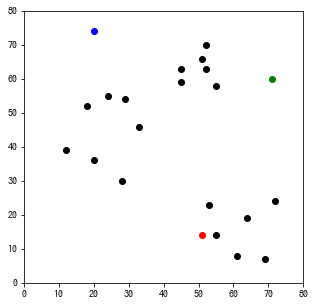

In [2]:
## 初期化

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(42)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        46.324939        62.625873        35.902646        3     b
1  20  36        38.013156        56.364883        38.000000        3     b
2  28  30        28.017851        52.430907        44.721360        1     r
3  18  52        50.328918        53.600373        22.090722        3     b
4  29  54        45.650849        42.426407        21.931712        3     b


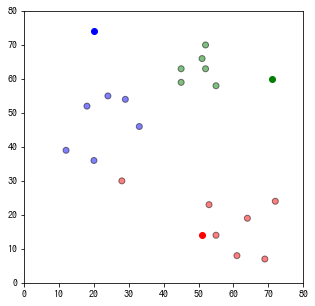

In [3]:
## 割り当て

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

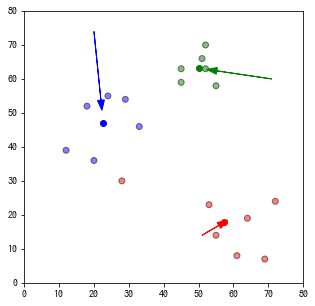

In [4]:
## 更新

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

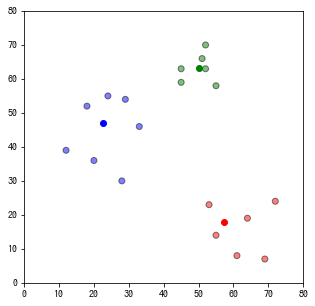

In [5]:
## 再度割り当て

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

赤い点の一つが緑に代わり、青い点の一つが赤になったことに注意。

前ステップよりも解に近づいている。

それではこれを収束するまで繰り返す。

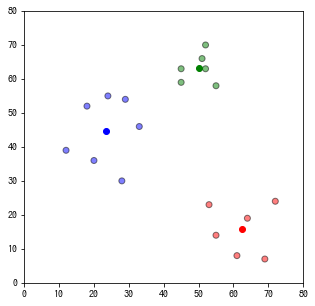

In [6]:
# 変化がなくなるまで繰り返す
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

3つのはっきりとしたクラスタに分かれた。

同じことを ___<font color="red">scikit-learn</font>___ を用いて行う。

In [7]:
# scikit-learn 利用版
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

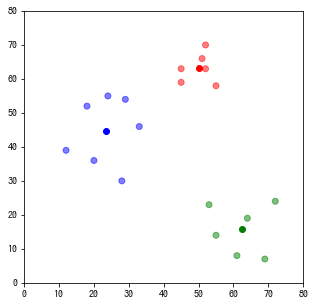

In [8]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_ 

fig = plt.figure(figsize=(5, 5))

colmap = {1: 'r', 2: 'g', 3: 'b'}

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5)

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### センサデータに対する適用

以下で、実際のセンサデータに対して適用する。例としてエンジントルクと速度のデータに対してクラスタリングを行おう。

In [9]:
# データを読み込む
df_raw = pd.read_csv("../data/interim/20190605_CAN/103.486_CAR1V21_HDD2/Job1/"
                     + "SUZUKI_YSB-021_MRR_2016-04-20_06-27_0001.BLF.csv",
                     names=['vin', 'time1', 'time2', 'feature', 'value'])

In [10]:
df_raw.head()

,vin,time1,time2,feature,value
0,21,201604200627,0.295909,0FA53,0.0
1,21,201604200627,0.295909,0FA57,4.0
2,21,201604200627,0.295909,0FA43,0.0
3,21,201604200627,0.295909,0FA44,0.0
4,21,201604200627,0.295909,0FA45,0.0


In [11]:
# 前処理として、0.1 秒単位でビンを切って中央値で集約し、欠損値については線形補間を行う
df = (
    df_raw
    .assign(rounded_time2=np.round(df_raw.time2, 1)) # time2を小数点以下1桁(0.1)で丸めて rounded_time2 列とする
    .groupby(["vin", "time1","rounded_time2","feature"])["value"].median() # 中央値で集約
    .unstack(level=-1) # feature列について横積みにする
    .interpolate() # NA を線形補完する
    .dropna() # 残った NA （先頭にNAがあったケース）を除外する
)

In [12]:
df.head()

feature                         0FA21  0FA22  0FA23  0FA25  0FA26  0FA27  \
vin time1        rounded_time2                                             
21  201604200627 0.9              2.0    0.0    0.0    0.0    0.0    0.0   
                 1.0              2.0    0.0    0.0    0.0    0.0    0.0   
                 1.1              2.0    0.0    0.0    0.0    0.0    0.0   
                 1.2              2.0    0.0    0.0    0.0    0.0    0.0   
                 1.3              2.0    0.0    0.0    0.0    0.0    0.0   

feature                         0FA32  0FA35  0FA37  0FA43  ...  46007  46307  \
vin time1        rounded_time2                              ...                 
21  201604200627 0.9              2.0    0.0    2.0    0.0  ...    0.0   13.0   
                 1.0              2.0    0.0    1.0    0.0  ...    0.0   13.0   
                 1.1              2.0    0.0    2.0    0.0  ...    0.0   13.0   
                 1.2              2.0    0.0    1.0    0.0  ...    0.0   13.0   
                 1.3              2.0    0.0    2.0    0.0  ...    0.0   13.0   

feature                         46313  46317  46327  47F01  47F06  4E573  \
vin time1        rounded_time2                                             
21  201604200627 0.9              1.0    5.0    1.0    0.0    1.0    0.0   
                 1.0              1.0    5.0    1.0    0.0    1.0    0.0   
                 1.1              1.0    5.0    1.0    0.0    1.0    0.0   
                 1.2              1.0    5.0    1.0    0.0    1.0    0.0   
                 1.3              1.0    5.0    1.0    0.0    1.0    0.0   

feature                         4E577         50007  
vin time1        rounded_time2                       
21  201604200627 0.9              0.0  8.431021e+18  
                 1.0              0.0  8.431302e+18  
                 1.1              0.0  8.431583e+18  
                 1.2              0.0  8.431724e+18  
                 1.3              0.0  8.431864e+18  

[5 rows x 549 columns]

In [13]:
# "Engine Torque Actual" および "Vehicle Speed" の列を抜き出す
df_torque_speed = df[['12013', '31417']]
df_torque_speed.columns = ['engine_torque_actual', 'vehicle_speed']

In [14]:
df_torque_speed

engine_torque_actual  vehicle_speed
vin time1        rounded_time2                                     
21  201604200627 0.9                           0.000            0.0
                 1.0                           0.000            0.0
                 1.1                           0.000            0.0
                 1.2                           0.000            0.0
                 1.3                           0.000            0.0
                 1.4                           0.000            0.0
                 1.5                           0.000            0.0
                 1.6                           0.000            0.0
                 1.7                           0.000            0.0
                 1.8                           0.000            0.0
                 1.9                           0.000            0.0
                 2.0                           0.000            0.0
                 2.1                          -0.250            0.0
                 2.2                          -0.250            0.0
                 2.3                          -0.250            0.0
                 2.4                          -0.500            0.0
                 2.5                          -0.250            0.0
                 2.6                          -0.250            0.0
                 2.7                           0.000            0.0
                 2.8                          -0.250            0.0
                 2.9                           0.000            0.0
                 3.0                          -0.375            0.0
                 3.1                           0.000            0.0
                 3.2                           0.000            0.0
                 3.3                          -0.250            0.0
                 3.4                           0.000            0.0
                 3.5                           0.000            0.0
                 3.6                           0.000            0.0
                 3.7                          -0.250            0.0
                 3.8                          -0.750            0.0
...                                              ...            ...
                 596.3                         0.000            0.0
                 596.4                         0.000            0.0
                 596.5                         0.000            0.0
                 596.6                        -0.250            0.0
                 596.7                         0.000            0.0
                 596.8                         0.000            0.0
                 596.9                         0.000            0.0
                 597.0                         0.000            0.0
                 597.1                         0.000            0.0
                 597.2                        -0.250            0.0
                 597.3                         0.000            0.0
                 597.4                         0.000            0.0
                 597.5                         0.125            0.0
                 597.6                         0.125            0.0
                 597.7                         0.000            0.0
                 597.8                         0.000            0.0
                 597.9                         0.000            0.0
                 598.0                        -0.125            0.0
                 598.1                         0.000            0.0
                 598.2                        -0.500            0.0
                 598.3                         0.000            0.0
                 598.4                         0.000            0.0
                 598.5                        -0.125            0.0
                 598.6                         0.000            0.0
                 598.7                         0.000            0.0
                 598.8                         0.000            0.0
                 598

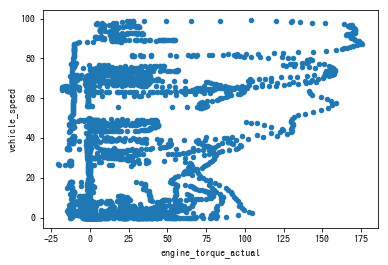

In [15]:
# データをそのままプロットする
df_torque_speed.plot.scatter('engine_torque_actual', 'vehicle_speed')

In [16]:
# Scaling
df_norm_torque_speed = (df_torque_speed - df_torque_speed.mean()) / df_torque_speed.std() 

In [17]:
df_norm_torque_speed.std()

engine_torque_actual    1.0
vehicle_speed           1.0
dtype: float64

In [18]:
df_norm_torque_speed.mean()

engine_torque_actual   -2.106502e-15
vehicle_speed          -1.038608e-15
dtype: float64

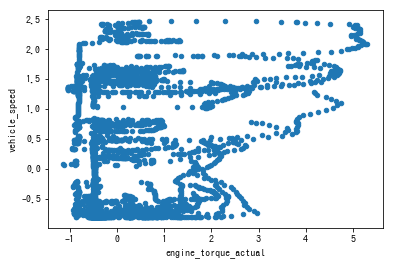

In [19]:
# データをそのままプロットする
df_norm_torque_speed.plot.scatter('engine_torque_actual', 'vehicle_speed')

In [20]:
# KMeans によるクラスタリングを行う
km = KMeans(n_clusters=4)

# df.assign(new_col = ~~~~~~)
df_norm_torque_speed = df_norm_torque_speed.assign(cluster=km.fit_predict(df_norm_torque_speed))

# 上の行は以下の2行のコードと同じ処理である。
# 一度クラスタリングを行なって計算された重心を使って新たなデータの予測を行なう場合などは分けておく方が良い。
# 
# km.fit(df_norm_torque_speed)
# df_norm_torque_speed = df_norm_torque_speed.assign(cluster=km.predict(df_norm_torque_speed))

In [21]:
df_norm_torque_speed.head()

engine_torque_actual  vehicle_speed  cluster
vin time1        rounded_time2                                              
21  201604200627 0.9                       -0.461083      -0.814136        2
                 1.0                       -0.461083      -0.814136        2
                 1.1                       -0.461083      -0.814136        2
                 1.2                       -0.461083      -0.814136        2
                 1.3                       -0.461083      -0.814136        2

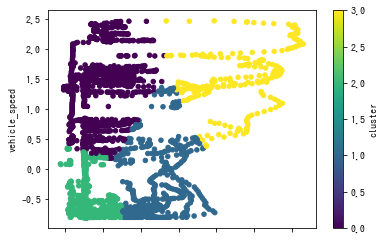

In [22]:
# クラスタリング結果のプロット
df_norm_torque_speed.plot.scatter(x='engine_torque_actual', 
                             y='vehicle_speed', c='cluster', 
                             colormap='viridis')

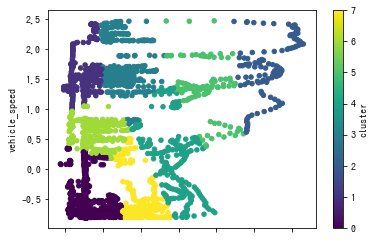

In [23]:
km = KMeans(n_clusters=8)

df_norm_torque_speed = df_norm_torque_speed.assign(
    cluster=km.fit_predict(df_norm_torque_speed))
df_norm_torque_speed.plot.scatter(x='engine_torque_actual', 
                                  y='vehicle_speed', 
                                  c='cluster', 
                                  colormap='viridis')

#### 演習

- クラスタ数(n_clusters)を変えながら、プロットしてみましょう
- 以下のアルゴリズムを試してみましょう

In [24]:
from sklearn import mixture, cluster

In [25]:
# gmm
gmm = mixture.GaussianMixture(n_components=5)

# birch
birch = cluster.Birch(n_clusters=5)

# DBSCAN
dbscan = cluster.DBSCAN(eps=0.5)

# ward
ward = cluster.AgglomerativeClustering(
        n_clusters=5, linkage='ward') # complete, average, single

# spectral
spectral = cluster.SpectralClustering(n_clusters=5)

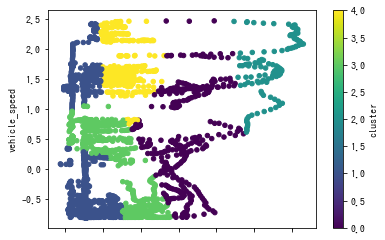

In [26]:
# birch
m = cluster.Birch(n_clusters=5)
res = m.fit_predict(df_norm_torque_speed)
df_norm_torque_speed = df_norm_torque_speed.assign(
    cluster=res)
df_norm_torque_speed.plot.scatter(x='engine_torque_actual', 
                                  y='vehicle_speed', 
                                  c='cluster', 
                                  colormap='viridis')

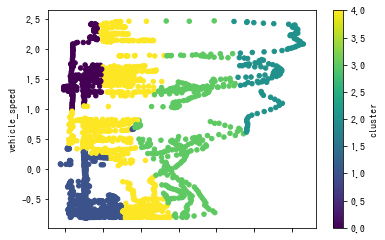

In [27]:
# spectral
m = cluster.SpectralClustering(n_clusters=5)
res = m.fit_predict(df_norm_torque_speed)
df_norm_torque_speed = df_norm_torque_speed.assign(
    cluster=res)
df_norm_torque_speed.plot.scatter(x='engine_torque_actual', 
                                  y='vehicle_speed', 
                                  c='cluster', 
                                  colormap='viridis')

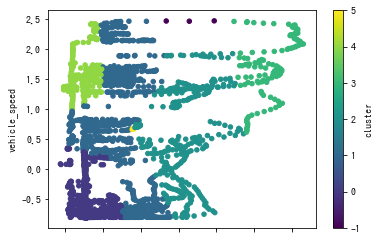

In [28]:
# DBSCAN
m = cluster.DBSCAN(eps=0.5)
df_norm_torque_speed = df_norm_torque_speed.assign(
    cluster=m.fit_predict(df_norm_torque_speed))
df_norm_torque_speed.plot.scatter(x='engine_torque_actual', 
                                  y='vehicle_speed', 
                                  c='cluster', 
                                  colormap='viridis')

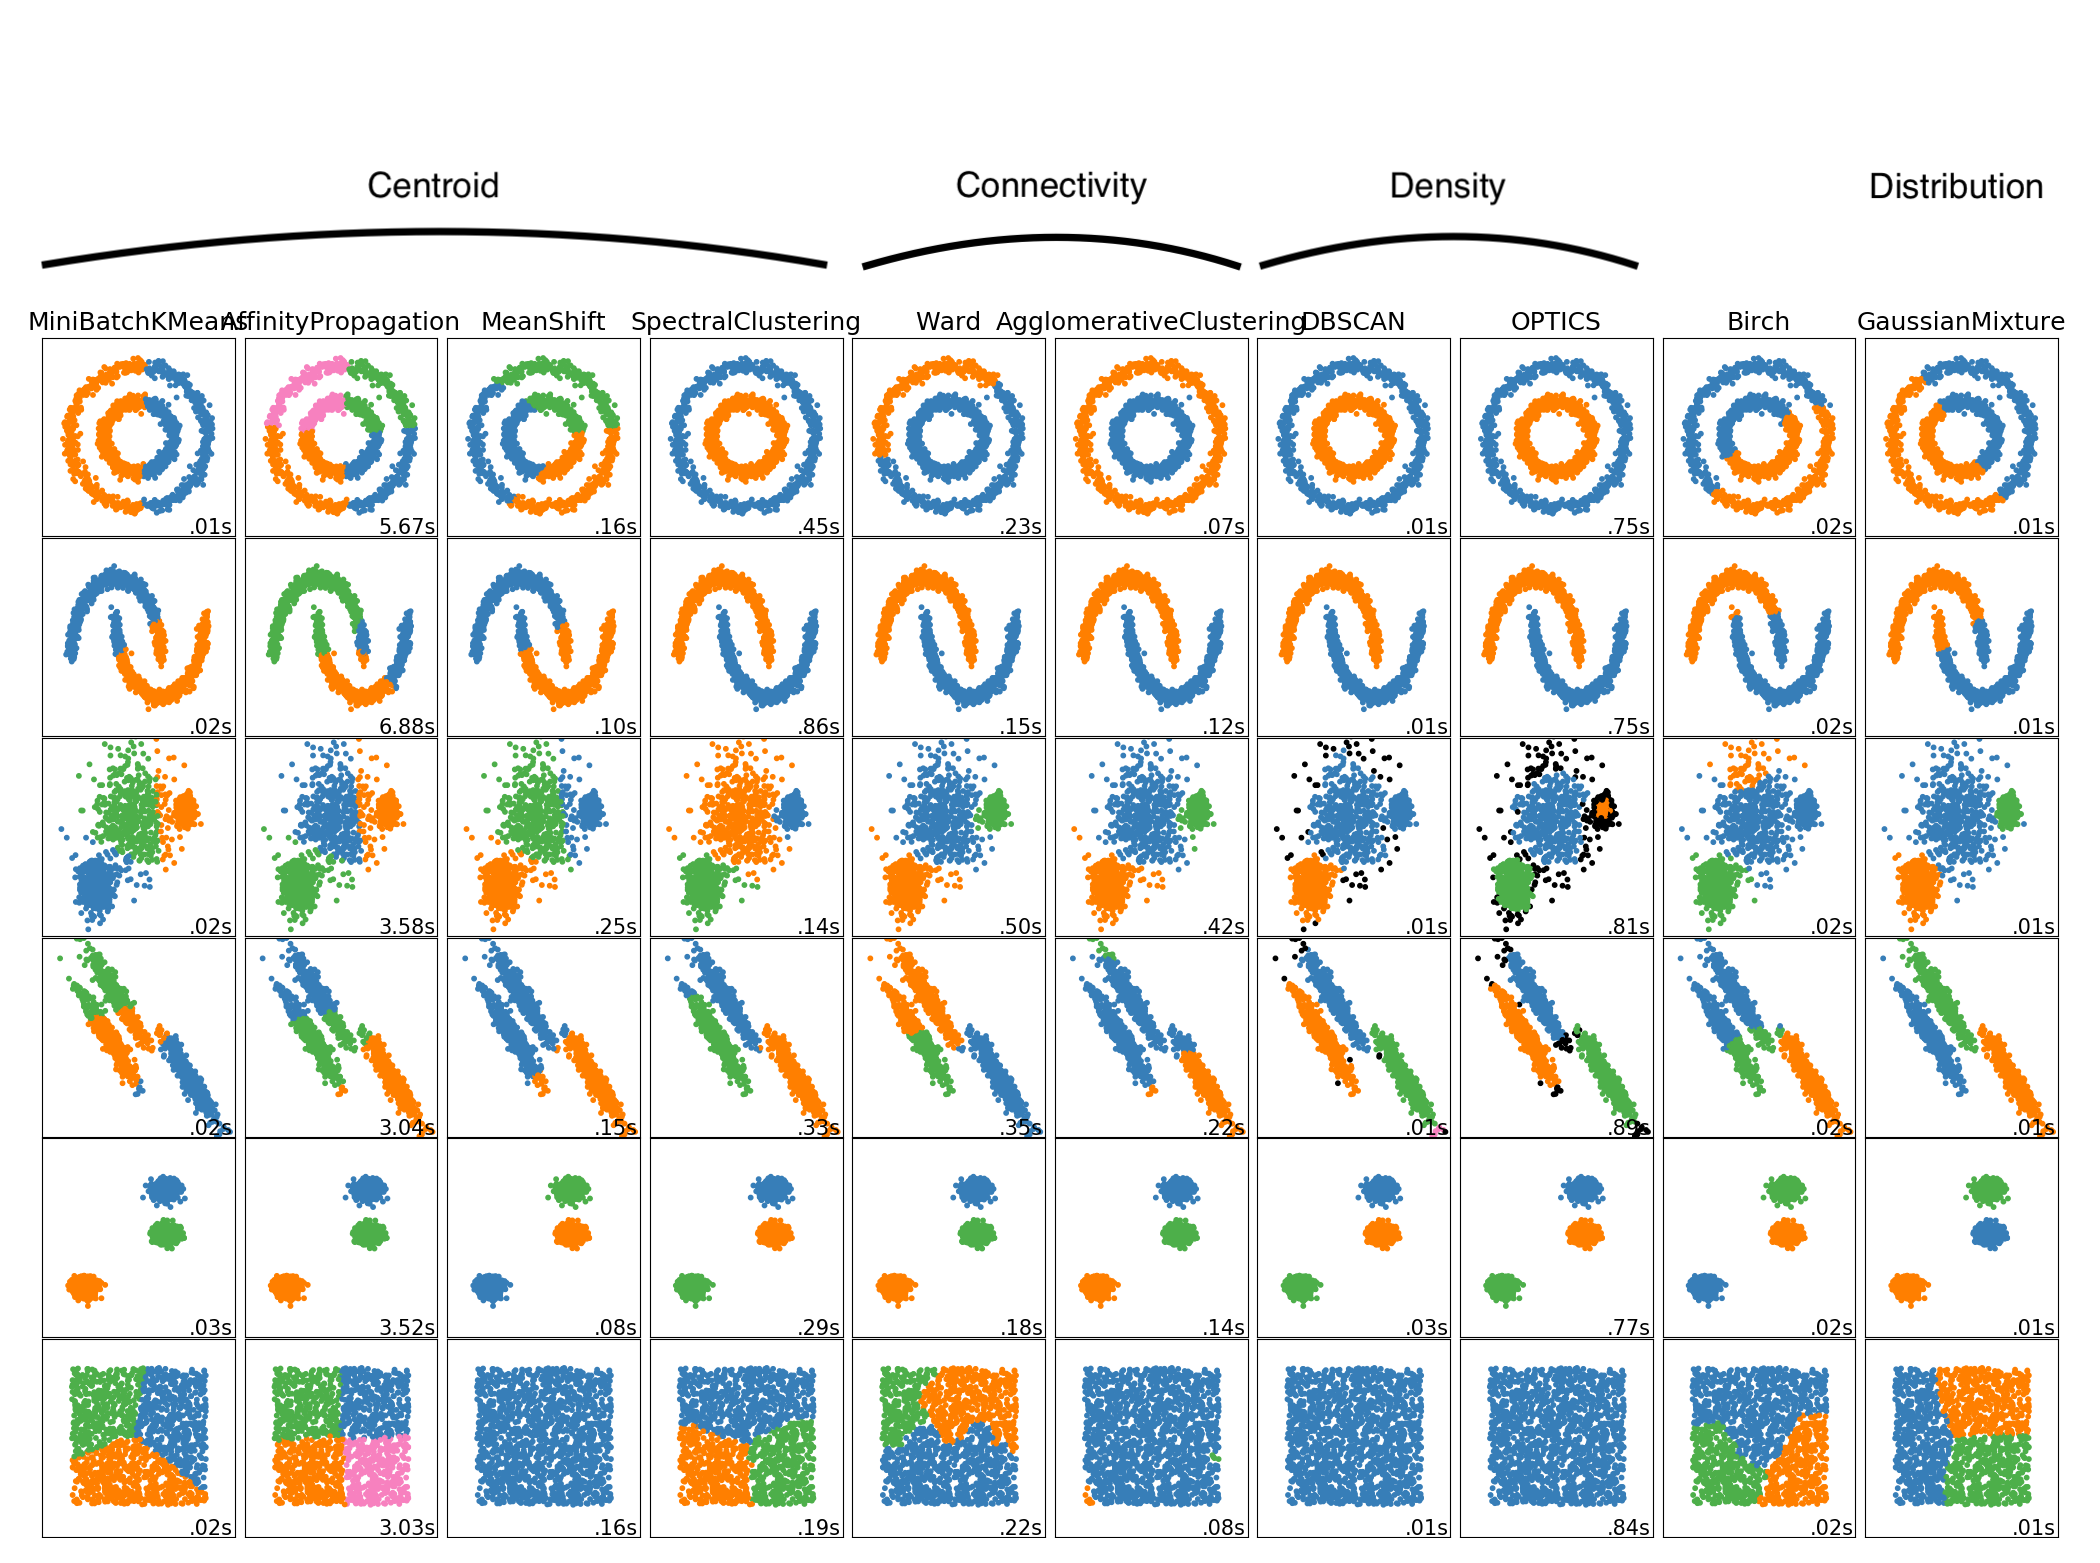

In [29]:
from IPython.display import Image
Image("figures/sphx_glr_plot_cluster_comparison_001.png")

## 宿題

- センサーデータについて、以下の6つのペアについて、以下の各アルゴリズムで4つのクラスタにクラスタリングし、その結果を散布図で描写してください。
    - KMeans
    - GMM
    - 階層クラスタリング(Ward法)
    - DBSCAN
    - 階層クラスタリング(平均法)
        - cluster.AgglomerativeClusteringにおいて、linkage="average"と指定してください。

- センサーのペア
    - ("Steering Wheel Absolute Angle", "Yaw Rate 1(learmed data)")
    - ("Engine Speed", "Yaw Rate 1(learmed data)")
    - ("Engine Speed", "Vehicle Speed")
    - ("Lateral Sensor Value", "Yaw Rate 1(learmed data)")
    - ("Vehicle Speed", "Turn Left SW")
    - ("Fuel Level Percent Average", "Acceleration Sensor Value")

- DBSCANはクラスタ数は指定できないので、適当なepsを与えてクラスタリングしてください。
- 正規化を掛けたのち、クラスタリングを行ってください。

In [30]:
# データを読み込む
import pandas as pd
import numpy as np


df_raw = pd.read_csv("../data/interim/20190605_CAN/103.486_CAR1V21_HDD2/Job1/"
                     + "SUZUKI_YSB-021_MRR_2016-04-20_06-27_0001.BLF.csv",
                     names=['vin', 'time1', 'time2', 'feature', 'value'])

# 読み替え表データ
df_feature_name = pd.read_csv("../data/interim/20190605_CAN/20190617_featureName.csv")
df_feature_name["key"] = df_feature_name["key"].str[2:]
feature_name_dict = df_feature_name.set_index("key")["featureName"].to_dict()

# 集約して横持ちに
df = (
    df_raw
    .assign(rounded_time2=np.round(df_raw.time2, 1)) # time2を小数点以下1桁(0.1)で丸めて rounded_time2 列とする
    .groupby(["vin", "time1","rounded_time2","feature"])["value"].median() # 中央値で集約
    .unstack(level=-1) # feature列について横積みにする
    .interpolate() # NA を線形補完する
    .dropna() # 残った NA （先頭にNAがあったケース）を除外する
)

# 読み替え
df = df.rename(columns=feature_name_dict)

In [31]:
# 試しに1ペア取り出す
df[["Steering Wheel Absolute Angle", "Yaw Rate 1(learmed data)"]].head()

feature                         Steering Wheel Absolute Angle  \
vin time1        rounded_time2                                  
21  201604200627 0.9                                     -7.7   
                 1.0                                     -7.7   
                 1.1                                     -7.7   
                 1.2                                     -7.7   
                 1.3                                     -7.7   

feature                         Yaw Rate 1(learmed data)  
vin time1        rounded_time2                            
21  201604200627 0.9                                0.00  
                 1.0                                0.03  
                 1.1                                0.01  
                 1.2                                0.03  
                 1.3                                0.02

In [33]:
# ペア一覧
sensor_pairs = [
    ["Steering Wheel Absolute Angle", "Yaw Rate 1(learmed data)"],
    ["Engine Speed", "Yaw Rate 1(learmed data)"],
    ["Engine Speed", "Vehicle Speed"],
    ["Lateral Sensor Value", "Yaw Rate 1(learmed data)"],
    ["Vehicle Speed", "Turn Left SW"],
    ["Fuel Level Percent Average", "Acceleration Sensor Value"],
]